In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nba.csv to nba.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(
    io.BytesIO(uploaded['nba.csv']),
    encoding='latin1',
    encoding_errors='ignore',
    sep=';'
)

print(df.head())

   Rk            Player   Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
0   1  Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  ...  0.616   
1   1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  ...  0.571   
2   1  Precious Achiuwa    PF   24  NYK  49  18  24.2  3.2   6.1  ...  0.643   
3   2       Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  ...  0.755   
4   3      Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  ...  0.661   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  2.6  4.0   6.6  1.3  0.6  0.9  1.1  1.9   7.6  
1  2.0  3.4   5.4  1.8  0.6  0.5  1.2  1.6   7.7  
2  2.9  4.3   7.2  1.1  0.6  1.1  1.1  2.1   7.6  
3  2.2  8.1  10.4  3.9  1.1  0.9  2.3  2.2  19.3  
4  0.9  1.8   2.8  1.1  0.6  0.6  0.8  1.5   5.8  

[5 rows x 30 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

In [ ]:
df.isnull().sum()

,0
Rk,0
Player,0
Pos,0
Age,0
Tm,0
G,0
GS,0
MP,0
FG,0
FGA,0


In [ ]:
# Criando um novo DataFrame sem as linhas de total pois estava
# inflacionando estastisticas de jogadores que jogaram por mais de um time
df_sem_tot = df[df['Tm'] != 'TOT'].copy()

print(df_sem_tot.shape)
print(df.shape)

(657, 30)
(735, 30)


In [ ]:
# Preenchendo todos os valores nulos restantes com 0
df_limpo = df_sem_tot.fillna(0)

# Verificando se ainda existem valores nulos
print(df_limpo.isnull().sum().sum())

0


In [ ]:
# Removendo a coluna 'Rk'
df_limpo = df_limpo.drop(columns=['Rk'])

# Renomeando algumas colunas para ficarem mais claras
df_limpo = df_limpo.rename(columns={
    'Tm': 'Time',
    'Pos': 'Posicao',
    'G': 'Jogos',
    'PTS': 'Pontos'
})

print(df_limpo.head())

             Player Posicao  Age Time  Jogos  GS    MP   FG   FGA    FG%  ...  \
1  Precious Achiuwa       C   24  TOR     25   0  17.5  3.1   6.8  0.459  ...   
2  Precious Achiuwa      PF   24  NYK     49  18  24.2  3.2   6.1  0.525  ...   
3       Bam Adebayo       C   26  MIA     71  71  34.0  7.5  14.3  0.521  ...   
5      Ochai Agbaji      SG   23  UTA     51  10  19.7  2.1   4.9  0.426  ...   
6      Ochai Agbaji      SG   23  TOR     27  18  23.6  2.7   6.8  0.391  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  Pontos  
1  0.571  2.0  3.4   5.4  1.8  0.6  0.5  1.2  1.6     7.7  
2  0.643  2.9  4.3   7.2  1.1  0.6  1.1  1.1  2.1     7.6  
3  0.755  2.2  8.1  10.4  3.9  1.1  0.9  2.3  2.2    19.3  
5  0.750  0.7  1.8   2.5  0.9  0.5  0.6  0.7  1.3     5.4  
6  0.611  1.4  1.9   3.3  1.3  0.7  0.6  1.1  1.9     6.7  

[5 rows x 29 columns]


In [ ]:
# Contando quantas linhas duplicadas existem
duplicatas = df_limpo.duplicated().sum()
print(f"Existem {duplicatas} linhas duplicadas.")

# Removendo as linhas que existirem
if duplicatas > 0:
  df_limpo = df_limpo.drop_duplicates()

Existem 0 linhas duplicadas.


In [ ]:
df_limpo.describe().round(2)

,Age,Jogos,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Pontos
count,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,...,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00
mean,25.98,40.18,18.72,18.32,3.02,6.51,0.44,0.92,2.60,0.30,...,0.68,0.83,2.45,3.28,1.95,0.59,0.39,0.96,1.46,8.15
std,4.32,25.90,25.57,9.97,2.43,4.92,0.12,0.87,2.21,0.16,...,0.26,0.75,1.80,2.39,1.85,0.41,0.41,0.78,0.80,6.68
min,19.00,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,16.00,0.00,10.20,1.20,2.90,0.40,0.20,0.90,0.25,...,0.64,0.30,1.10,1.50,0.70,0.30,0.10,0.40,0.90,3.30
50%,25.00,39.00,5.00,17.20,2.30,5.00,0.45,0.70,2.10,0.34,...,0.76,0.60,2.10,2.80,1.30,0.50,0.30,0.70,1.50,6.10
75%,29.00,65.00,30.00,26.90,4.40,9.10,0.50,1.40,3.80,0.38,...,0.83,1.10,3.40,4.40,2.60,0.90,0.50,1.30,2.00,11.50
max,39.00,82.00,82.00,37.80,11.50,23.60,0.80,4.80,11.80,1.00,...,1.00,4.60,10.10,13.70,10.90,2.10,3.60,4.40,3.60,34.70


In [ ]:
# Selecionando apenas as colunas numéricas para a correlação
colunas_numericas = df_limpo.select_dtypes(include=['number'])
matriz_correlacao = colunas_numericas.corr()

# Exibe a correlação da coluna 'Pontos' com todas as outras, em ordem decrescente
print(matriz_correlacao['Pontos'].sort_values(ascending=False))

Pontos    1.000000
FG        0.992434
FGA       0.984084
2PA       0.930912
2P        0.915803
FT        0.904002
FTA       0.897438
MP        0.889136
TOV       0.874312
GS        0.786462
AST       0.778598
DRB       0.746450
3P        0.745307
3PA       0.744444
TRB       0.673639
STL       0.644749
PF        0.643644
Jogos     0.580523
BLK       0.406540
FT%       0.397663
ORB       0.360029
eFG%      0.331808
FG%       0.320670
3P%       0.301457
2P%       0.228772
Age       0.094493
Name: Pontos, dtype: float64


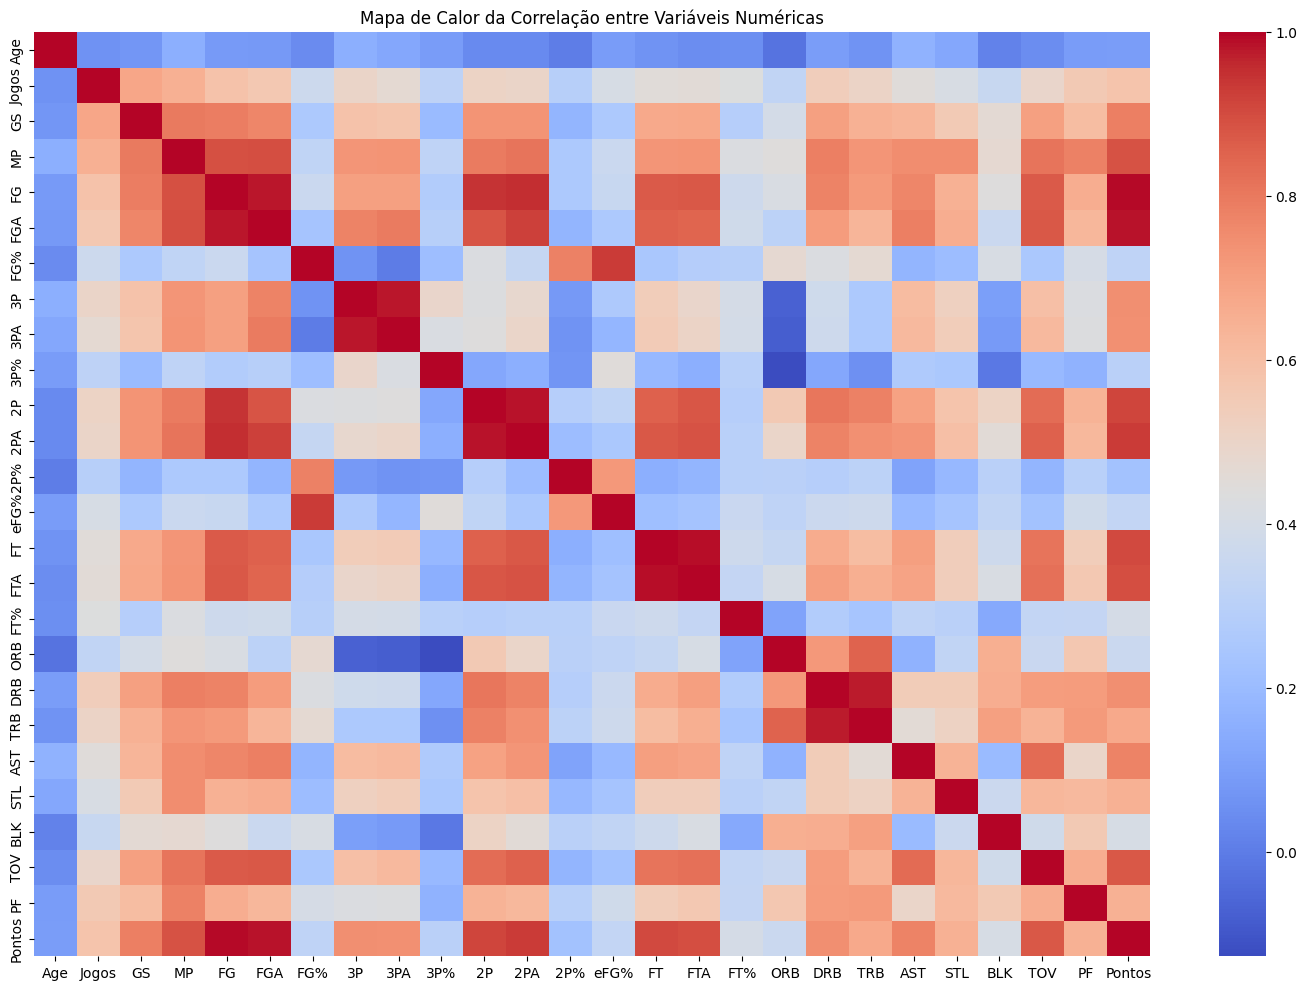

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.heatmap(matriz_correlacao, annot=False, cmap='coolwarm')
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()

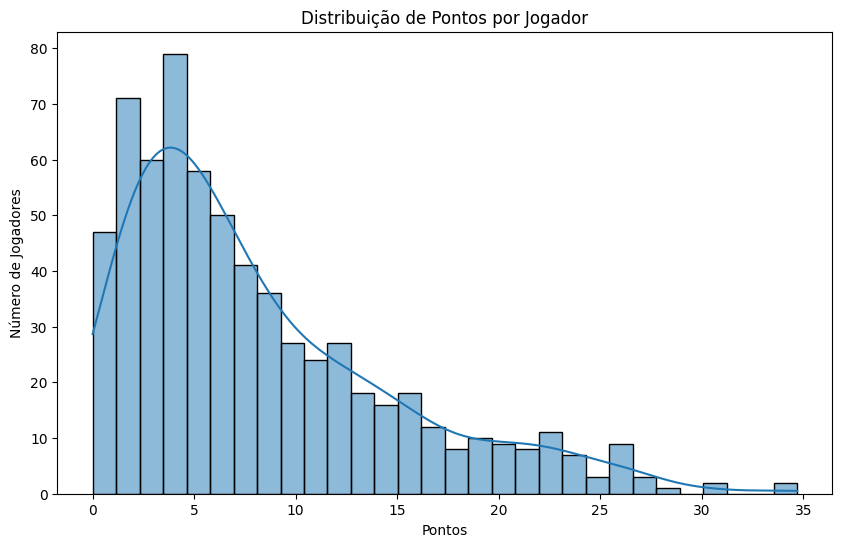

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_limpo['Pontos'], bins=30, kde=True)
plt.title('Distribuição de Pontos por Jogador')
plt.xlabel('Pontos')
plt.ylabel('Número de Jogadores')
plt.show()

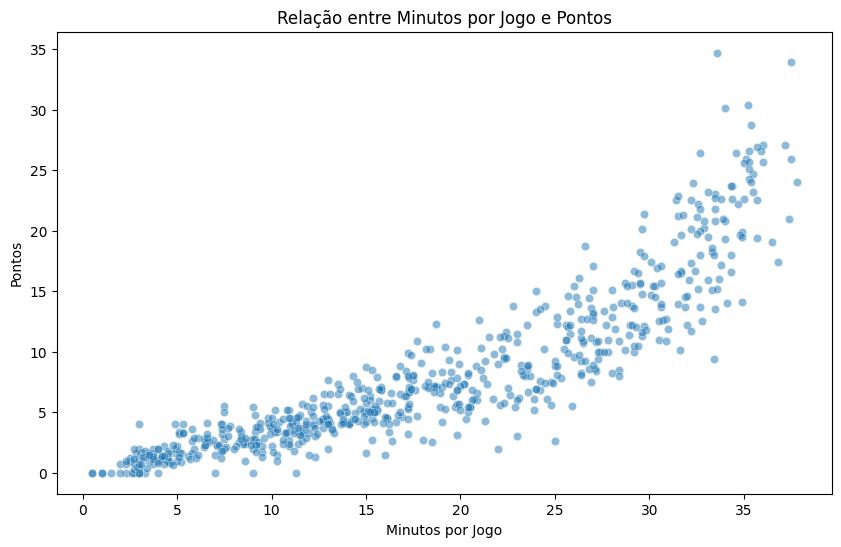

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MP', y='Pontos', data=df_limpo, alpha=0.5)
plt.title('Relação entre Minutos por Jogo e Pontos')
plt.xlabel('Minutos por Jogo')
plt.ylabel('Pontos')
plt.show()

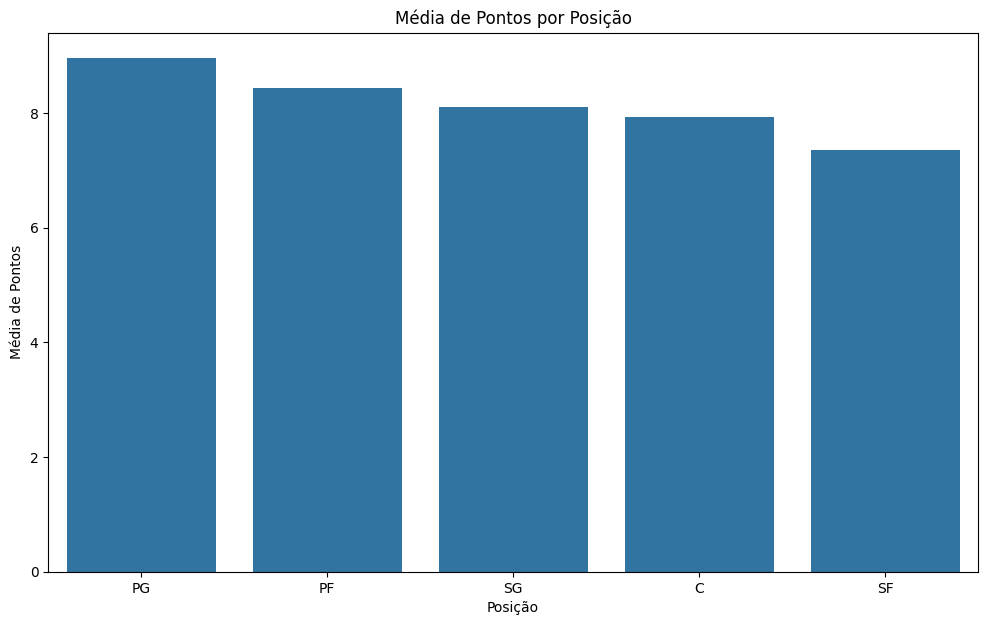

In [ ]:
# Calcula a média de pontos por posição
pontos_por_posicao = df_limpo.groupby('Posicao')['Pontos'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=pontos_por_posicao.index, y=pontos_por_posicao.values)
plt.title('Média de Pontos por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de Pontos')
plt.show()

In [ ]:
# Top 10 em Pontos por Jogo
top10_pontos = df_limpo.nlargest(10, 'Pontos')

# Top 10 em Rebotes por Jogo
top10_rebotes = df_limpo.nlargest(10, 'TRB')

# Top 10 em Assistências por Jogo
top10_assistencias = df_limpo.nlargest(10, 'AST')

print("------ Top 10 Pontuadores ------")
print(top10_pontos[['Player', 'Time', 'Posicao', 'Pontos']])
print("\n------ Top 10 Reboteiros ------")
print(top10_rebotes[['Player', 'Time', 'Posicao', 'TRB']])
print("\n------ Top 10 em Assistências ------")
print(top10_assistencias[['Player', 'Time', 'Posicao', 'AST']])

------ Top 10 Pontuadores ------
                      Player Time Posicao  Pontos
186              Joel Embiid  PHI       C    34.7
171              Luka Don?i?  DAL      PG    33.9
14     Giannis Antetokounmpo  MIL      PF    30.4
235  Shai Gilgeous-Alexander  OKC      PG    30.1
109            Jalen Brunson  NYK      PG    28.7
81              Devin Booker  PHO      PG    27.1
180             Kevin Durant  PHO      PF    27.1
630             Jayson Tatum  BOS      PF    26.9
207             De'Aaron Fox  SAC      PG    26.6
454         Donovan Mitchell  CLE      SG    26.6

------ Top 10 Reboteiros ------
                    Player Time Posicao   TRB
577       Domantas Sabonis  SAC       C  13.7
241            Rudy Gobert  MIN       C  12.9
155          Anthony Davis  LAL       C  12.6
340           Nikola Joki?  DEN       C  12.4
181            Jalen Duren  DET       C  11.6
14   Giannis Antetokounmpo  MIL      PF  11.5
22           Deandre Ayton  POR       C  11.1
186            J

In [ ]:
# Top 10 jogadores que mais arremessam por jogo
top10_volume = df_limpo.nlargest(10, 'FGA')

print("------ Top 10 em Volume de Arremessos (FGA) ------")
print(top10_volume[['Player', 'Time', 'FGA', 'Pontos', 'FG%']])

------ Top 10 em Volume de Arremessos (FGA) ------
                      Player Time   FGA  Pontos    FG%
171              Luka Don?i?  DAL  23.6    33.9  0.487
186              Joel Embiid  PHI  21.8    34.7  0.529
109            Jalen Brunson  NYK  21.4    28.7  0.479
207             De'Aaron Fox  SAC  20.9    26.6  0.465
415             Tyrese Maxey  PHI  20.3    25.9  0.450
235  Shai Gilgeous-Alexander  OKC  19.8    30.1  0.535
454         Donovan Mitchell  CLE  19.8    26.6  0.462
183          Anthony Edwards  MIN  19.7    25.9  0.461
153            Stephen Curry  GSW  19.5    26.4  0.450
314             Kyrie Irving  DAL  19.5    25.6  0.497


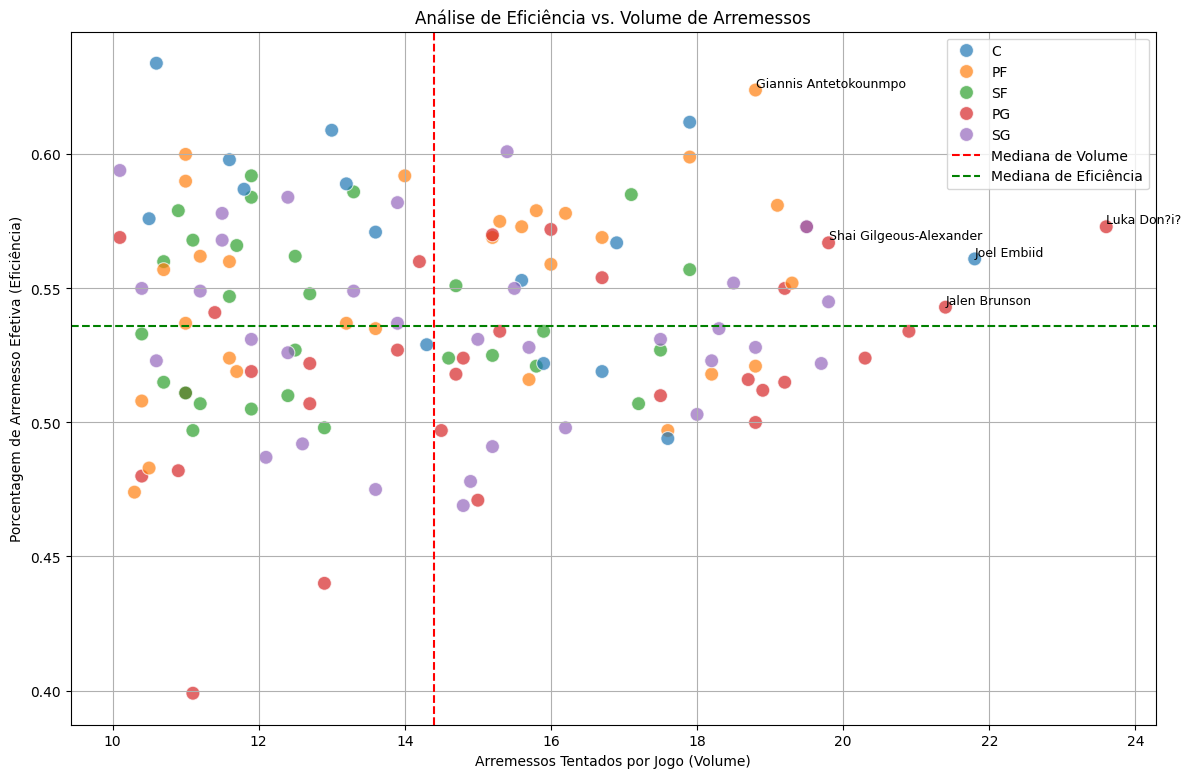

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos jogadores com um volume mínimo de arremessos para a análise ser relevante
df_relevante = df_limpo[df_limpo['FGA'] > 10]

plt.figure(figsize=(14, 9))
sns.scatterplot(x='FGA', y='eFG%', data=df_relevante, hue='Posicao', s=100, alpha=0.7)

# Adicionar labels para alguns jogadores notáveis para dar contexto
jogadores_notaveis = df_relevante.nlargest(5, 'Pontos') # Pega os 5 maiores pontuadores
for i, row in jogadores_notaveis.iterrows():
    plt.text(row['FGA'], row['eFG%'], row['Player'], fontsize=9, ha='left', va='bottom')

plt.title('Análise de Eficiência vs. Volume de Arremessos')
plt.xlabel('Arremessos Tentados por Jogo (Volume)')
plt.ylabel('Porcentagem de Arremesso Efetiva (Eficiência)')
plt.axvline(df_relevante['FGA'].median(), color='red', linestyle='--', label='Mediana de Volume')
plt.axhline(df_relevante['eFG%'].median(), color='green', linestyle='--', label='Mediana de Eficiência')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_limpo['Rank_Pontos'] = df_limpo['Pontos'].rank(ascending=False)
df_limpo['Rank_Rebotes'] = df_limpo['TRB'].rank(ascending=False)
df_limpo['Rank_Assistencias'] = df_limpo['AST'].rank(ascending=False)

df_limpo['Score_Versatilidade'] = df_limpo['Rank_Pontos'] + df_limpo['Rank_Rebotes'] + df_limpo['Rank_Assistencias']

# Os jogadores mais versáteis terão o menor score (rank mais baixo = melhor)
top10_versateis = df_limpo.nsmallest(10, 'Score_Versatilidade')

print("------ Top 10 Jogadores Mais Versáteis ------")
print(top10_versateis[['Player', 'Time', 'Pontos', 'TRB', 'AST', 'Score_Versatilidade']])

------ Top 10 Jogadores Mais Versáteis ------
                    Player Time  Pontos   TRB  AST  Score_Versatilidade
340           Nikola Joki?  DEN    26.4  12.4  9.0                 19.5
171            Luka Don?i?  DAL    33.9   9.2  9.8                 25.0
14   Giannis Antetokounmpo  MIL    30.4  11.5  6.5                 29.0
186            Joel Embiid  PHI    34.7  11.0  5.6                 47.0
325           LeBron James  LAL    25.7   7.3  8.3                 67.0
577       Domantas Sabonis  SAC    19.4  13.7  8.2                 68.0
550          Julius Randle  NYK    24.0   9.2  5.0                100.5
630           Jayson Tatum  BOS    26.9   8.1  4.9                106.5
39          Scottie Barnes  TOR    19.9   8.2  6.1                114.5
462              Ja Morant  MEM    25.1   5.6  8.1                114.5


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecionando apenas as colunas que fazem sentido normalizar
stats_cols = ['Age', 'Jogos', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Pontos']

# Instancia o Scaler
scaler = MinMaxScaler()

# Criando um novo DataFrame com as colunas normalizadas
df_norm = df_limpo.copy()
df_norm[stats_cols] = scaler.fit_transform(df_limpo[stats_cols])

print("Dados Originais:")
print(df_limpo[stats_cols].head())

print("\nDados Normalizados (Min-Max):")
print(df_norm[stats_cols].head())

Dados Originais:
   Age  Jogos    MP   FG   FGA    FG%   3P  3PA    3P%   2P  ...    FT%  ORB  \
1   24     25  17.5  3.1   6.8  0.459  0.5  1.9  0.277  2.6  ...  0.571  2.0   
2   24     49  24.2  3.2   6.1  0.525  0.3  1.0  0.260  2.9  ...  0.643  2.9   
3   26     71  34.0  7.5  14.3  0.521  0.2  0.6  0.357  7.3  ...  0.755  2.2   
5   23     51  19.7  2.1   4.9  0.426  0.9  2.8  0.331  1.2  ...  0.750  0.7   
6   23     27  23.6  2.7   6.8  0.391  0.6  2.6  0.217  2.1  ...  0.611  1.4   

   DRB   TRB  AST  STL  BLK  TOV   PF  Pontos  
1  3.4   5.4  1.8  0.6  0.5  1.2  1.6     7.7  
2  4.3   7.2  1.1  0.6  1.1  1.1  2.1     7.6  
3  8.1  10.4  3.9  1.1  0.9  2.3  2.2    19.3  
5  1.8   2.5  0.9  0.5  0.6  0.7  1.3     5.4  
6  1.9   3.3  1.3  0.7  0.6  1.1  1.9     6.7  

[5 rows x 25 columns]

Dados Normalizados (Min-Max):
    Age     Jogos        MP        FG       FGA      FG%        3P       3PA  \
1  0.25  0.296296  0.455764  0.269565  0.288136  0.57375  0.104167  0.161017   


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

# Criando um novo DataFrame com as colunas padronizadas
df_std = df_limpo.copy()
df_std[stats_cols] = scaler_std.fit_transform(df_limpo[stats_cols])

print("\nDados Padronizados (Z-score):")
print(df_std[stats_cols].head())


Dados Padronizados (Z-score):
        Age     Jogos        MP        FG       FGA       FG%        3P  \
1 -0.459178 -0.586675 -0.082614  0.033207  0.059757  0.139502 -0.483685   
2 -0.459178  0.340713  0.589582  0.074448 -0.082564  0.675435 -0.714631   
3  0.004588  1.190819  1.572793  1.847827  1.584627  0.642954 -0.830104   
5 -0.691062  0.417995  0.138107 -0.379207 -0.326543 -0.128465 -0.021794   
6 -0.691062 -0.509393  0.529385 -0.131759  0.059757 -0.412672 -0.368213   

        3PA       3P%        2P  ...       FT%       ORB       DRB       TRB  \
1 -0.317504 -0.123963  0.260070  ... -0.424525  1.565840  0.526584  0.888214   
2 -0.724925 -0.232478  0.416064  ... -0.149595  2.770004  1.027338  1.641568   
3 -0.906002  0.386696  2.703981  ...  0.278074  1.833432  3.141632  2.980865   
5  0.089918  0.220732 -0.467904  ...  0.258982 -0.173507 -0.363646 -0.325523   
6 -0.000620 -0.506957  0.000079  ... -0.271786  0.763065 -0.308006  0.009301   

        AST       STL       BLK      

In [ ]:
# Agrupa por time e calcula a média das colunas de estatísticas
df_times_media = df_limpo.groupby('Time')[stats_cols].mean().round(2)

print("------ DataFrame Secundário: Médias por Time ------")
print(df_times_media.head())

# Média de pontos por time
print("\nTimes com maior média de pontos por jogador:")
print(df_times_media.nlargest(5, 'Pontos')['Pontos'])

------ DataFrame Secundário: Médias por Time ------
        Age  Jogos     MP    FG   FGA   FG%    3P   3PA   3P%    2P  ...  \
Time                                                                 ...   
ATL   25.79  42.05  20.39  3.33  7.33  0.44  1.14  3.16  0.31  2.18  ...   
BOS   26.00  45.05  17.95  3.13  6.36  0.49  1.13  2.93  0.37  1.99  ...   
BRK   25.14  40.05  19.79  3.06  6.85  0.43  1.01  2.90  0.29  2.05  ...   
CHI   26.17  46.28  19.99  3.36  7.16  0.44  0.94  2.69  0.28  2.42  ...   
CHO   25.12  32.19  21.48  3.47  7.63  0.44  1.05  3.02  0.29  2.42  ...   

       FT%   ORB   DRB   TRB   AST   STL   BLK   TOV    PF  Pontos  
Time                                                                
ATL   0.70  1.02  2.64  3.65  2.11  0.63  0.38  1.02  1.66    9.21  
BOS   0.73  0.89  2.65  3.52  1.89  0.57  0.51  0.83  1.31    8.53  
BRK   0.68  0.93  2.66  3.58  2.25  0.60  0.41  1.00  1.49    8.30  
CHI   0.69  1.00  2.72  3.71  1.83  0.65  0.42  0.94  1.61    8.96  
C

In [ ]:
# Agrupa por posição e aplica diferentes funções de agregação a diferentes colunas
df_posicao_agg = df_limpo.groupby('Posicao').agg(
    Total_Pontos=('Pontos', 'sum'),
    Media_Rebotes=('TRB', 'mean'),
    Max_Assistencias=('AST', 'max'),
    Numero_Jogadores=('Player', 'count') # Conta quantos jogadores há em cada posição
).round(2)

# Ordena pelo total de pontos
df_posicao_agg = df_posicao_agg.sort_values(by='Total_Pontos', ascending=False)

print("\n------ DataFrame Secundário: Resumo por Posição ------")
print(df_posicao_agg)


------ DataFrame Secundário: Resumo por Posição ------
         Total_Pontos  Media_Rebotes  Max_Assistencias  Numero_Jogadores
Posicao                                                                 
SG             1184.1           2.37               6.6               146
PG             1155.3           2.50              10.9               129
PF             1113.3           3.78               8.3               132
SF             1036.7           2.92               5.7               141
C               864.5           5.27               9.0               109


In [ ]:
df_limpo.to_csv('nba_dados_limpos.csv', index=False)